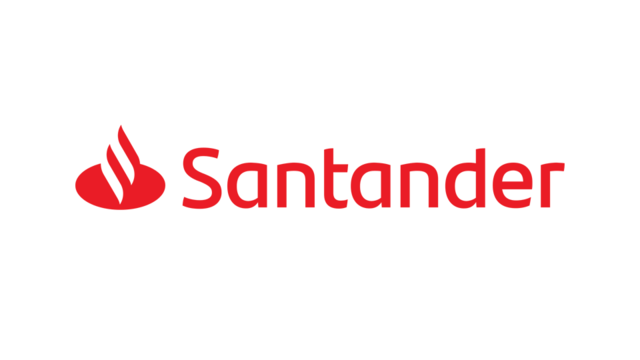

In [1]:
from IPython.display import display, Image

display(Image(filename='/Users/gaurav/Downloads/santander-logo.png'))

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
from datetime import datetime
import timeit
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 11)
import warnings
warnings.filterwarnings("ignore")

Populating the interactive namespace from numpy and matplotlib


/Users/gaurav/opt/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['datetime']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# Creating Feature Column and Target Column

In [2]:
# columns to be used as features #
feature_cols = ["ind_empleado","pais_residencia","sexo","age", "ind_nuevo", "antiguedad", "nomprov", "segmento"]

dtype_list = {'ind_cco_fin_ult1': 'float16', 'ind_deme_fin_ult1': 'float16', 'ind_aval_fin_ult1': 'float16', 
              'ind_valo_fin_ult1': 'float16', 'ind_reca_fin_ult1': 'float16', 'ind_ctju_fin_ult1': 'float16',
              'ind_cder_fin_ult1': 'float16', 'ind_plan_fin_ult1': 'float16', 'ind_fond_fin_ult1': 'float16', 
              'ind_hip_fin_ult1': 'float16', 'ind_pres_fin_ult1': 'float16', 'ind_nomina_ult1': 'float16', 
              'ind_cno_fin_ult1': 'float16', 'ncodpers': 'int64', 'ind_ctpp_fin_ult1': 'float16', 
              'ind_ahor_fin_ult1': 'float16', 'ind_dela_fin_ult1': 'float16', 'ind_ecue_fin_ult1': 'float16', 
              'ind_nom_pens_ult1': 'float16', 'ind_recibo_ult1': 'float16', 'ind_deco_fin_ult1': 'float16', 
              'ind_tjcr_fin_ult1': 'float16', 'ind_ctop_fin_ult1': 'float16', 'ind_viv_fin_ult1': 'float16', 
              'ind_ctma_fin_ult1': 'float16'}

target_cols = ['ind_ahor_fin_ult1','ind_aval_fin_ult1','ind_cco_fin_ult1','ind_cder_fin_ult1','ind_cno_fin_ult1',
               'ind_ctju_fin_ult1','ind_ctma_fin_ult1','ind_ctop_fin_ult1','ind_ctpp_fin_ult1','ind_deco_fin_ult1',
               'ind_deme_fin_ult1','ind_dela_fin_ult1','ind_ecue_fin_ult1','ind_fond_fin_ult1','ind_hip_fin_ult1',
               'ind_plan_fin_ult1','ind_pres_fin_ult1','ind_reca_fin_ult1','ind_tjcr_fin_ult1','ind_valo_fin_ult1',
               'ind_viv_fin_ult1','ind_nomina_ult1','ind_nom_pens_ult1','ind_recibo_ult1']

dates =['fecha_dato','ult_fec_cli_1t']

# Spanish to English Column Name Dictionary

In [3]:
eng_num_features = ['Employee_Index','Age','New_customer', 'Relnshp_Mnths', 'Relnshp_flag','Residence_flag', 'Forigner_flag', 'Emp_spouse_flag','Deceased_flag', 'Activity_flag', 'Gross_household_income']
eng_target_features = ['Saving_account', 'Guarantees', 'Cur_account', 'Derivative_account', 'Payroll_account',
                'Junior_account', 'Particular_acct1', 'Particular_acct2', 'Particular_acct3', 'Short_term_deposites',
                'Med_term_deposites', 'Long_term_deposites', 'e-account', 'Funds', 'Mortgage', 'Pension', 'Loans',
                'Taxes', 'Credit_card', 'Securities', 'Home_account', 'Payroll', 'Pensions', 'Direct_debit']

In [4]:
span_eng_feat_dict = {'fecha_dato': 'Month_status_date', 'ncodpers': 'Customer_ID', 'ind_empleado': 'Employee_Index',
                     'pais_residencia':'Customer_country', 'sexo': 'Sex', 'age': 'Age', 'fecha_alta': 'Join_date',
                     'ind_nuevo': 'New_customer', 'antiguedad':'Relnshp_Mnths', 'indrel': 'Relnshp_flag',
                     'ult_fec_cli_1t': 'Last_date_Prim_Cust', 'indrel_1mes': 'Cust_type_beg_Mth', 'tiprel_1mes':'Cust_Reln_type_beg_mth',
                     'indresi': 'Residence_flag', 'indext': 'Forigner_flag', 'conyuemp': 'Emp_spouse_flag', 'canal_entrada':'Channel_when_joined',
                     'indfall': 'Deceased_flag','tipodom':'Address_type', 'cod_prov':'Customer_address','nomprov': 'Address_detail', 
                     'ind_actividad_cliente': 'Activity_flag', 'renta': 'Gross_household_income', 'segmento' :'Segment' }

# Reading Train and Test Dataset

In [5]:
#importing dataset using pandas with specified datatype
train = pd.read_csv("/Users/gaurav/Downloads/santander-product-recommendation (2)/train_ver2.csv",dtype=dtype_list, na_values=['NA', 'NaN','     NA',' NA'],parse_dates=dates)

In [6]:
test = pd.read_csv("/Users/gaurav/Downloads/santander-product-recommendation (2)/test_ver2.csv",dtype=dtype_list, na_values=['NA', 'NaN','     NA',' NA'], parse_dates=dates)

# Train And Test Size

In [8]:
print("Size of train dataset: {} rows and {} columns".format(train.shape[0],train.shape[1] ))
print("Size of test dataset: {} rows and {} columns".format(test.shape[0],test.shape[1] ))

Size of train dataset: 13647309 rows and 48 columns
Size of test dataset: 929615 rows and 24 columns


# Change Column Name from Spanish Language to English Language for easy Understanbility 

In [7]:
train.columns = ['Month_status_date', 'Customer_ID', 'Employee_Index', 'Customer_country', 'Sex', 'Age', 'Join_date',
                'New_customer', 'Relnshp_Mnths', 'Relnshp_flag','Last_date_Prim_Cust', 'Cust_type_beg_Mth', 'Cust_Reln_type_beg_mth',
                'Residence_flag', 'Forigner_flag', 'Emp_spouse_flag', 'Channel_when_joined', 'Deceased_flag', 
                'Address_type', 'Customer_address', 'Address_detail', 'Activity_flag', 'Gross_household_income',
                'Segment', 'Saving_account', 'Guarantees', 'Cur_account', 'Derivative_account', 'Payroll_account',
                'Junior_account', 'Particular_acct1', 'Particular_acct2', 'Particular_acct3', 'Short_term_deposites',
                'Med_term_deposites', 'Long_term_deposites', 'e-account', 'Funds', 'Mortgage', 'Pension', 'Loans',
                'Taxes', 'Credit_card', 'Securities', 'Home_account', 'Payroll', 'Pensions', 'Direct_debit']

In [8]:
test.columns = ['Month_status_date', 'Customer_ID', 'Employee_Index', 'Customer_country', 'Sex', 'Age', 'Join_date',
                'New_customer', 'Relnshp_Mnths', 'Relnshp_flag','Last_date_Prim_Cust', 'Cust_type_beg_Mth', 'Cust_Reln_type_beg_mth',
                'Residence_flag', 'Forigner_flag', 'Emp_spouse_flag', 'Channel_when_joined', 'Deceased_flag', 
                'Address_type', 'Customer_address', 'Address_detail', 'Activity_flag', 'Gross_household_income',
                'Segment']

# Train And Test Data type Info

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13647309 entries, 0 to 13647308
Data columns (total 48 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   Month_status_date       datetime64[ns]
 1   Customer_ID             int64         
 2   Employee_Index          object        
 3   Customer_country        object        
 4   Sex                     object        
 5   Age                     float64       
 6   Join_date               object        
 7   New_customer            float64       
 8   Relnshp_Mnths           float64       
 9   Relnshp_flag            float64       
 10  Last_date_Prim_Cust     datetime64[ns]
 11  Cust_type_beg_Mth       object        
 12  Cust_Reln_type_beg_mth  object        
 13  Residence_flag          object        
 14  Forigner_flag           object        
 15  Emp_spouse_flag         object        
 16  Channel_when_joined     object        
 17  Deceased_flag           object        
 18  

In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 929615 entries, 0 to 929614
Data columns (total 24 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Month_status_date       929615 non-null  datetime64[ns]
 1   Customer_ID             929615 non-null  int64         
 2   Employee_Index          929615 non-null  object        
 3   Customer_country        929615 non-null  object        
 4   Sex                     929610 non-null  object        
 5   Age                     929615 non-null  int64         
 6   Join_date               929615 non-null  object        
 7   New_customer            929615 non-null  int64         
 8   Relnshp_Mnths           929615 non-null  int64         
 9   Relnshp_flag            929615 non-null  int64         
 10  Last_date_Prim_Cust     1683 non-null    datetime64[ns]
 11  Cust_type_beg_Mth       929592 non-null  float64       
 12  Cust_Reln_type_beg_mth  929592

Pensions                     16063
Payroll                      16063
Activity_flag                27734
Deceased_flag                27734
Forigner_flag                27734
Relnshp_flag                 27734
Employee_Index               27734
New_customer                 27734
Customer_country             27734
Relnshp_Mnths                27734
Age                          27734
Residence_flag               27734
Join_date                    27734
Address_type                 27735
Sex                          27804
Customer_address             93591
Address_detail               93591
Cust_Reln_type_beg_mth      149781
Cust_type_beg_Mth           149781
Channel_when_joined         186126
Segment                     189368
Gross_household_income     2794375
Last_date_Prim_Cust       13622516
Emp_spouse_flag           13645501
dtype: int64

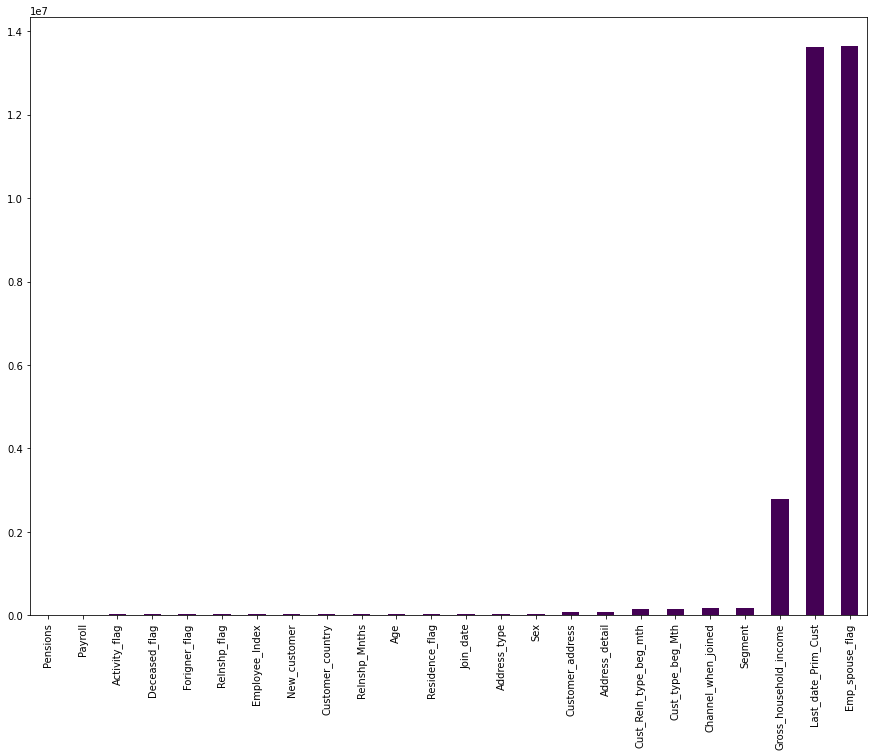

In [13]:
mis_train = train.isnull().sum()
mis_train = mis_train[mis_train>0]
mis_train.sort_values(inplace = True)
mis_train.plot.bar(cmap='viridis')
mis_train

Sex                            5
Cust_type_beg_Mth             23
Cust_Reln_type_beg_mth        23
Channel_when_joined         2081
Segment                     2248
Customer_address            3996
Address_detail              3996
Last_date_Prim_Cust       927932
Emp_spouse_flag           929511
dtype: int64

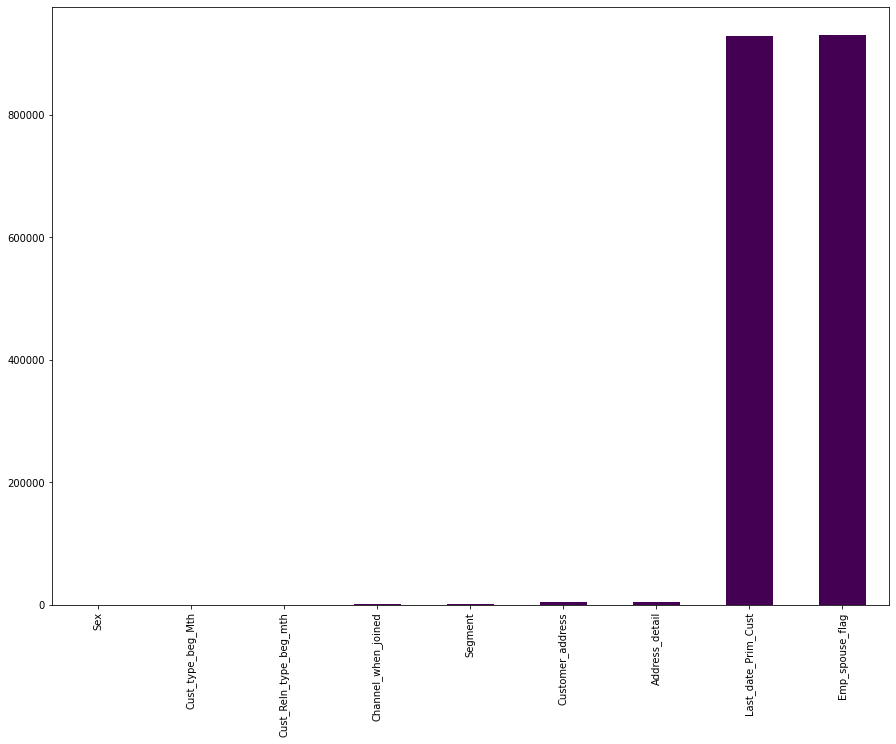

In [14]:
mis_test = test.isnull().sum()
mis_test = mis_test[mis_test>0]
mis_test.sort_values(inplace = True)
mis_test.plot.bar(cmap='viridis')
mis_test

In [15]:
print("Unique customers in train:", len(train['Customer_ID'].unique()))
print("Unique customers in test:", len(test['Customer_ID'].unique()))
print("Common customers in train and test:", len(set(train['Customer_ID'].unique()).intersection(set(test['Customer_ID'].unique()))))

Unique customers in train: 956645
Unique customers in test: 929615
Common customers in train and test: 929615


Every customer in test is also there in train data

# DATA CLEANING

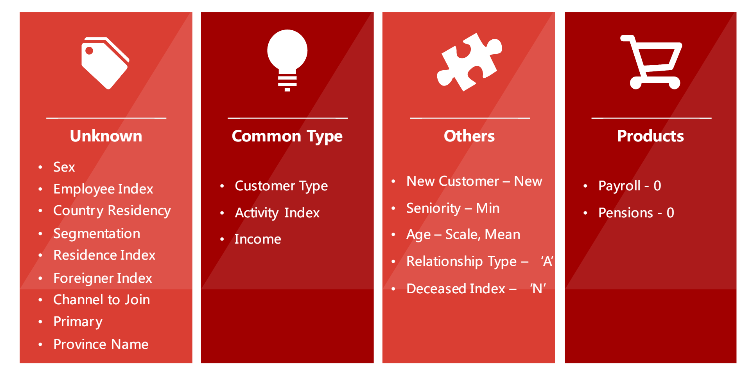

In [16]:
from IPython.display import display, Image

display(Image(filename='/Users/gaurav/Downloads/imputation.png'))

There were about 4 kinds of imputation strategy implement for this data set. For the features in the ‘Unknown’ column, the missing values were all labeled as ‘unknown’. The reason is that the features in this column are more customer’s demographic information. Therefore, in order not to make any assumption, labeling ‘unknown’ was the only way. For the features in the Common Type column, the median of each features were imputed for the missing values because those were the features that described the relationship between the bank or continued variable. The features in the others were imputed by couple different methods. Beside the ‘age’ feature, the missing values of rest of the features were fill in based on treating those observation as new customers. From the EDA, we were discovered that those missing values were the same observations. And within those observations, ‘all the account activities were under 6 months, which were also the bench mark for being a new customers. For the ‘age’ features, the after scaled mean were using for imputation in order to avoid some skewness in the data. Last but not least, there were two kinds of products having missing values. Due to the evaluation penalized the false negative, we would like to assume that the products havent been purchased yet.

## COMMON TYPE CATEGORY

### Impute Customer Type

In [9]:
train.Cust_type_beg_Mth.isnull().sum()

149781

In [10]:
train.Cust_type_beg_Mth.unique()

array([1.0, nan, 3.0, 2.0, '1.0', '1', '3', '3.0', '2.0', '4.0', 'P', '4',
       4.0, '2'], dtype=object)

In [11]:
train.Cust_type_beg_Mth.value_counts()

1.0    7277607
1.0    4017746
1      2195328
3.0       1804
3.0       1409
3         1137
P          874
2          483
2.0        479
2.0        355
4.0        143
4.0         93
4           70
Name: Cust_type_beg_Mth, dtype: int64

In [12]:
train.Cust_Reln_type_beg_mth = train.Cust_Reln_type_beg_mth.astype("category")

# As suggested by @StephenSmith
map_dict = { 1.0  : "1",
            "1.0" : "1",
            "1"   : "1",
            "3.0" : "3",
            "P"   : "P",
            3.0   : "3",
            2.0   : "2",
            "3"   : "3",
            "2.0" : "2",
            "4.0" : "4",
            "4"   : "4",
            "2"   : "2",
            4.0   : "4"}

train.Cust_type_beg_Mth.fillna("P",inplace=True)
train.Cust_type_beg_Mth = train.Cust_type_beg_Mth.apply(lambda x: map_dict.get(x,x))
train.Cust_type_beg_Mth = train.Cust_type_beg_Mth.astype(object)

In [13]:
train.Cust_type_beg_Mth.unique()

array(['1', 'P', '3', '2', '4'], dtype=object)

In [14]:
test.Cust_type_beg_Mth.isnull().sum()

23

In [15]:
test.Cust_type_beg_Mth.unique()

array([ 1.,  3., nan])

In [16]:
test.Cust_Reln_type_beg_mth = test.Cust_Reln_type_beg_mth.astype("category")

# As suggested by @StephenSmith
map_dict = { 1.0  : "1",
            "1.0" : "1",
            "1"   : "1",
            "3.0" : "3",
            "P"   : "P",
            3.0   : "3",
            2.0   : "2",
            "3"   : "3",
            "2.0" : "2",
            "4.0" : "4",
            "4"   : "4",
            "2"   : "2",
            4.0   : "4"}

test.Cust_type_beg_Mth.fillna("P",inplace=True)
test.Cust_type_beg_Mth = test.Cust_type_beg_Mth.apply(lambda x: map_dict.get(x,x))
test.Cust_type_beg_Mth = test.Cust_type_beg_Mth.astype(object)

In [17]:
test.Cust_type_beg_Mth.unique()

array(['1', '3', 'P'], dtype=object)

### Impute Activity Index

In [18]:
np.sum(train["Activity_flag"].isnull())

27734

In [19]:
train['Activity_flag'].value_counts()

0.0    7384390
1.0    6235185
Name: Activity_flag, dtype: int64

In [20]:
train["Activity_flag"].median()

0.0

In [21]:
train.loc[train.Activity_flag.isnull(),"Activity_flag"] = train["Activity_flag"].median()

### Impute Address detail

In [22]:
train.Address_detail.unique()

array(['MALAGA', 'CIUDAD REAL', 'ZARAGOZA', 'TOLEDO', 'LEON', 'GIPUZKOA',
       'CACERES', 'GIRONA', 'ZAMORA', 'BARCELONA', 'SALAMANCA', 'BURGOS',
       'HUESCA', 'NAVARRA', 'AVILA', 'SEGOVIA', 'LUGO', 'LERIDA',
       'MADRID', 'ALICANTE', 'SORIA', 'SEVILLA', 'CANTABRIA',
       'BALEARS, ILLES', 'VALLADOLID', 'PONTEVEDRA', 'VALENCIA', 'TERUEL',
       'CORUÑA, A', 'OURENSE', 'JAEN', 'CUENCA', 'BIZKAIA', 'CASTELLON',
       'RIOJA, LA', 'ALBACETE', 'BADAJOZ', 'MURCIA', 'CADIZ', nan,
       'ALMERIA', 'GUADALAJARA', 'PALENCIA', 'PALMAS, LAS', 'CORDOBA',
       'HUELVA', 'GRANADA', 'ASTURIAS', 'SANTA CRUZ DE TENERIFE',
       'MELILLA', 'TARRAGONA', 'ALAVA', 'CEUTA'], dtype=object)

There was an issue with the unicode character ñ in A Coruña. I'll manually fix it,

In [23]:
train.loc[train.Address_detail=="CORU\xc3\x91A, A","Address_detail"] = "CORUNA, A"

There's some rows missing a city that I'll relabel as later I have to calculate Income based on Address details

In [24]:
train.loc[train.Address_detail.isnull(),"Address_detail"] = "UNKNOWN"

In [25]:
test.Address_detail.unique()

array(['MADRID', 'ALICANTE', 'CORUÑA, A', 'BARCELONA', 'BALEARS, ILLES',
       'PALMAS, LAS', 'TOLEDO', 'CORDOBA', 'MURCIA', 'CUENCA', 'MALAGA',
       'JAEN', 'CADIZ', 'SEVILLA', 'VALENCIA', 'CASTELLON', 'BADAJOZ',
       'OURENSE', 'GIRONA', 'GRANADA', 'CIUDAD REAL', 'CANTABRIA',
       'CACERES', 'MELILLA', 'ASTURIAS', 'ZARAGOZA', 'HUESCA', 'TERUEL',
       'LUGO', 'BURGOS', 'NAVARRA', 'VALLADOLID', 'SALAMANCA',
       'RIOJA, LA', 'LERIDA', 'LEON', 'GIPUZKOA', 'TARRAGONA', 'SORIA',
       'ALBACETE', 'SEGOVIA', 'HUELVA', 'PONTEVEDRA', 'ALMERIA', 'AVILA',
       'PALENCIA', 'GUADALAJARA', 'ALAVA', 'ZAMORA',
       'SANTA CRUZ DE TENERIFE', nan, 'BIZKAIA', 'CEUTA'], dtype=object)

In [26]:
test.loc[test.Address_detail=="CORU\xc3\x91A, A","Address_detail"] = "CORUNA, A"

In [27]:
test.loc[test.Address_detail.isnull(),"Address_detail"] = "UNKNOWN"

### Impute Income

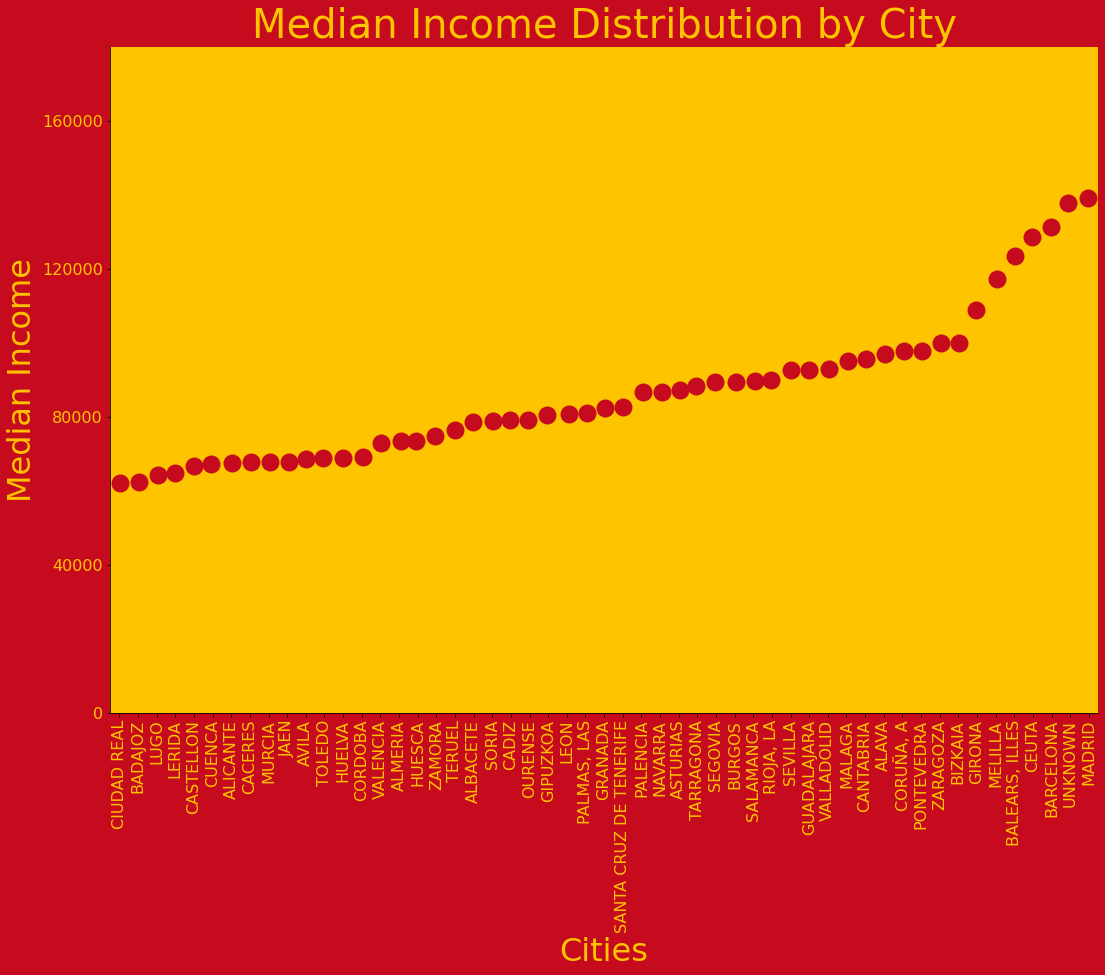

In [28]:
# median Gross_household_income with respect to Address_detail or cities

# creating a dataframe consisting of Address_detail or cities and respective gross household income
cities_vs_gross_household_income=train.loc[:,['Address_detail','Gross_household_income']]

# grouping the data by cities and calculating the median gross_household_income with respect
# to a particular city
cities_vs_median_income=cities_vs_gross_household_income.groupby(['Address_detail']).median()

cities_vs_median_income.sort_values(by=('Gross_household_income'),inplace=True)
cities_vs_median_income.reset_index(inplace=True)
cities_vs_median_income

import seaborn as sns
# plotting the graph
with sns.axes_style({
        "axes.facecolor":   "#ffc400",
        "axes.grid"     :    False,
        "figure.facecolor": "#c60b1e"}):
    h = sns.catplot(data=cities_vs_median_income,
                   x="Address_detail",
                   y="Gross_household_income",
                   order=(i for i in cities_vs_median_income.Address_detail.unique()),
                   height=10,
                   s=18,
                   aspect=1.5,
                   color="#c60b1e")

plt.xticks(rotation=90)
plt.tick_params(labelsize=16,labelcolor="#ffc400")
plt.ylabel("Median Income",size=32,color="#ffc400")
plt.xlabel("Cities",size=32,color="#ffc400")
plt.title("Median Income Distribution by City",size=40,color="#ffc400")
plt.ylim(0,180000)
plt.yticks(range(0,180000,40000))
plt.savefig('Median Income Distribution by City.png')

There's a lot of variation, so we think assigning missing incomes by providence is a good idea. First group the data by city, and reduce to get the median. This intermediate data frame is joined by the original city names to expand the aggregated median incomes, ordered so that there is a 1-to-1 mapping between the rows, and finally the missing values are replaced.

In [37]:
def medianRentaProvAll(dfp):
    nameProv = dfp.Address_detail.unique()[0]
    median = dfp.Gross_household_income.median(skipna=True)
    dfp.loc[dfp.Gross_household_income.isnull(), 'Gross_household_income'] = median
    return dfp
# Provide median by province
train = train.groupby('Address_detail').apply(medianRentaProvAll)  
# If any rows still null (i.e. a province has all null) then replace by overall median
train.loc[train.Gross_household_income.isnull(), "Gross_household_income"] = train.Gross_household_income.median

In [38]:
test.Gross_household_income = pd.to_numeric(test.Gross_household_income,errors="coerce")
np.sum(test["Gross_household_income"].isnull())

227965

In [39]:
# Provide median by province
test = test.groupby('Address_detail').apply(medianRentaProvAll)  
# If any rows still null (i.e. a province has all null) then replace by overall median
test.loc[test.Gross_household_income.isnull(), "Gross_household_income"] = test.Gross_household_income.median

### Impute Join Date

Some entries don't have the date they joined the company. So, I just gave them something in the middle of the pack

In [40]:
dates=train.loc[:,"Join_date"].sort_values().reset_index()
median_date = int(np.median(dates.index.values))
train.loc[train.Join_date.isnull(),"Join_date"] = dates.loc[median_date,"Join_date"]
train["Join_date"].describe()

count       13647309
unique          6756
top       2014-07-28
freq           57389
Name: Join_date, dtype: object

In [41]:
test.Month_status_date = pd.to_datetime(test.Month_status_date, format="%Y-%m-%d")
test.Join_date = pd.to_datetime(test.Join_date, format="%Y-%m-%d")

## OTHER CATEGORY

### Impute New Customer

In [42]:
train["New_customer"].value_counts()

0.0    12808368
1.0      811207
Name: New_customer, dtype: int64

In [43]:
train["New_customer"].isnull().sum()

27734

we can fill the missing values of New Customer by looking at how many months of history these customers have.

In [31]:
months_active = train.loc[train["New_customer"].isnull(),:].groupby(
                "Customer_ID", sort=False).size()
months_active.max()

6

Looks like these are all new customers, so we replace accordingly.

In [45]:
train.loc[train["New_customer"].isnull(),"New_customer"] = 1

### Impute Seniority

New_customer, Relationship_months and Join_date are all corelated variables.Customer would have joined before the observation period, but we do not have any information on that.Hence, I think, it is best to impute whether customer is New_customer or NOT.

In [46]:
train.Relnshp_Mnths = pd.to_numeric(train.Relnshp_Mnths,errors="coerce")
np.sum(train["Relnshp_Mnths"].isnull())

27734

That number again. Probably the same people that we just determined were new customers. Double check.

In [47]:
train.loc[train["Relnshp_Mnths"].isnull(),"New_customer"].describe()

count    27734.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: New_customer, dtype: float64

Yes, they are New_Customer. Let's give them minimum seniority.

In [48]:
train.loc[train.Relnshp_Mnths.isnull(),"Relnshp_Mnths"] = train.Relnshp_Mnths.min()

In [49]:
train.loc[train.Relnshp_Mnths <0, "Relnshp_Mnths"] = 0

In [50]:
test.Relnshp_Mnths.isnull().sum()

0

In [51]:
test.loc[test.Relnshp_Mnths <0, "Relnshp_Mnths"] = 0

### Impute Age

In [52]:
train["Age"] = train["Age"].replace(to_replace = ' NA', value = np.nan)

In [53]:
train["Age"] = train["Age"].astype("float")

In [54]:
train["Age"].isnull().sum()

27734

Minimum Age 2.0
Maximum Age 164.0


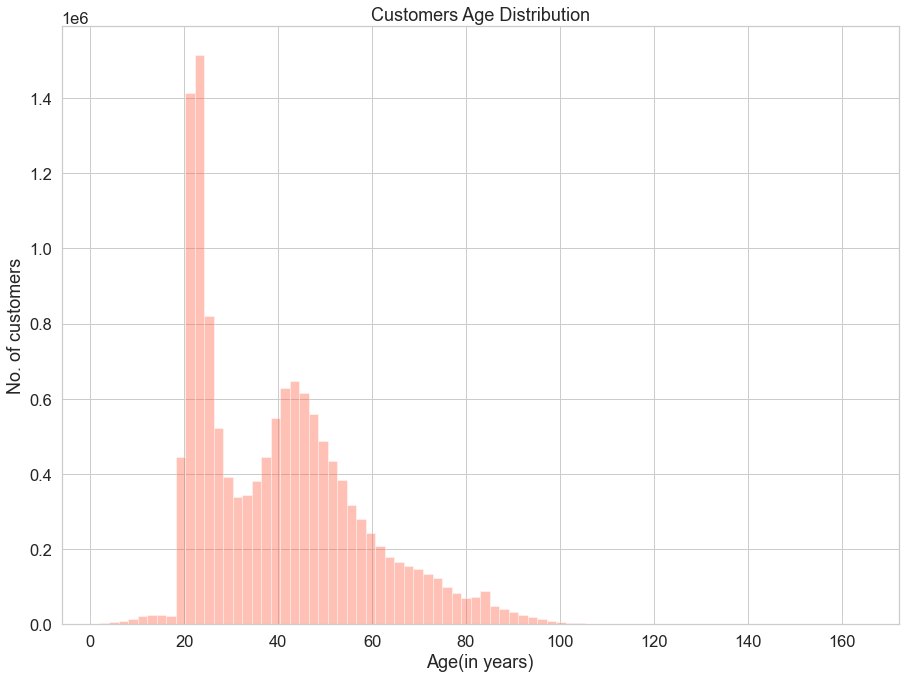

In [55]:
with sns.plotting_context("notebook",font_scale=1.5):
    sns.set_style("whitegrid")
    sns.distplot(train["Age"].dropna(),
                 bins=80,
                 kde=False,
                 color="tomato")
    plt.title('Customers Age Distribution')
    plt.xlabel('Age(in years)')
    plt.ylabel('No. of customers')
print('Minimum Age',train['Age'].min())
print('Maximum Age',train['Age'].max())

We have a bimodal distribution for the age and we have customer age from 0 to 164. Looks like there might be some products for small children under 18 & some product for young generation. It is not possible to have customers having age 164 so we cap the age at 100.

In [56]:
young = train[(train["Age"] > 18) & (train["Age"] < 30)]

In [57]:
young.groupby(["Segment", "Age"])["Customer_ID"].nunique("Customer_ID").unstack()

Age,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0
Segment,,,,,,,,,,,
01 - TOP,2,46,38,23,25,22,14,19,20,28,49
02 - PARTICULARES,4246,7795,3694,3432,3165,3112,3075,3268,4026,5592,7002
03 - UNIVERSITARIO,36,58387,81182,84715,88028,81732,58476,39891,30749,24294,18868


Looks like these are university students, as most of the young customers belong to university segment... It makes sense why we have a bimodal distribution

It looks like we have bimodal distribution here. 3 things to notice here -

1. We have some population under 18 having bank accounts.. these may be students or junior account holders where there parents have created an account for them.
2. We seem to have a group of people between 18 and 30 who could be students or early job starters. This segment has very high number of people than working people.
3. There are some people with age 164.. It's better to cap the age at 100

In [58]:
train.loc[train.Age > 100,"Age"] = train.loc[(train.Age >= 30) & (train.Age <= 100),"Age"].median(skipna=True)
train["Age"].fillna(train["Age"].mean(),inplace=True)
train["Age"] = train["Age"].astype(int)

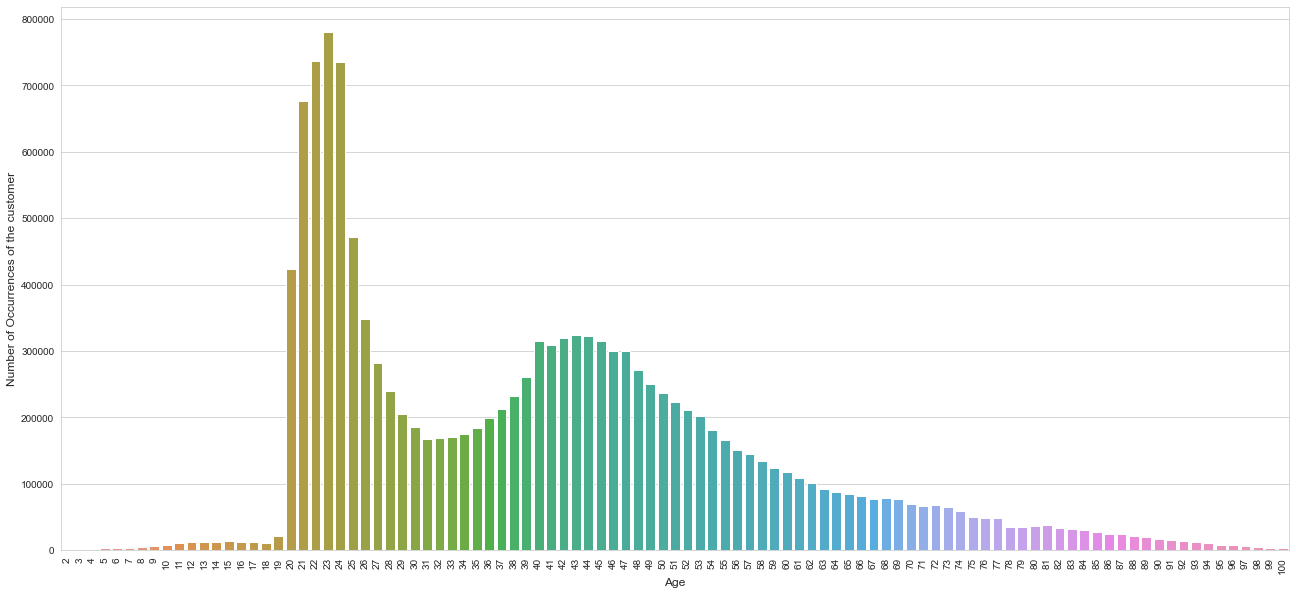

In [59]:
train['Age'] = train['Age'].astype('float64')

age_series = train.Age.value_counts()
plt.figure(figsize=(22,10))
sns.barplot(age_series.index.astype('int'), age_series.values)
plt.ylabel('Number of Occurrences of the customer', fontsize=12)
plt.xlabel('Age', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

In [60]:
test.Age.max()

164

In [61]:
test.loc[test.Age > 100,"Age"] = test.loc[(test.Age >= 30) & (test.Age <= 100),"Age"].median(skipna=True)
test["Age"] = test["Age"].astype(int)

### Impute Relationship Type

In [62]:
train.Cust_Reln_type_beg_mth.value_counts()

I    7304875
A    6187123
P       4656
R        870
N          4
Name: Cust_Reln_type_beg_mth, dtype: int64

Customer relation type at the beginning of the month, A (active), I (inactive), P (former customer),R (Potential) there is no category for "N" hence it's an observational error.

In [63]:
train['Cust_Reln_type_beg_mth'].replace(to_replace ="N", value ="A",inplace =True) 

The missing value for Relationship Type is imputed based on treating those observation as new customers

In [64]:
train.loc[train.Cust_Reln_type_beg_mth.isnull(),"Cust_Reln_type_beg_mth"] = "A"

In [65]:
test.Cust_Reln_type_beg_mth.isnull().sum()

23

In [66]:
test.Cust_Reln_type_beg_mth.value_counts()

I    535943
A    393622
P        27
Name: Cust_Reln_type_beg_mth, dtype: int64

In [67]:
test.loc[test.Cust_Reln_type_beg_mth.isnull(),"Cust_Reln_type_beg_mth"] = "A"

### Impute Deceased Index

In [68]:
train.Deceased_flag.value_counts()

N    13584813
S       34762
Name: Deceased_flag, dtype: int64

In [69]:
train.loc[train.Deceased_flag.isnull(),"Deceased_flag"] = "N"

### Impute Employee_Index

In [70]:
train["Employee_Index"].value_counts()

N    13610977
B        3566
F        2523
A        2492
S          17
Name: Employee_Index, dtype: int64

In [71]:
train['Employee_Index'].replace({"S":"N" }, inplace = True)

In [72]:
train['Employee_Index'].value_counts()

N    13610994
B        3566
F        2523
A        2492
Name: Employee_Index, dtype: int64

In [73]:
train['Employee_Index'].isnull().sum()
#filling Null values with most common values

27734

In [74]:
train.loc[train.Employee_Index.isnull(),"Employee_Index"] = "N"

### Impute Customer Country

In [75]:
train['Customer_country'].isnull().sum()

27734

In [76]:
train['Customer_country'].value_counts()

ES    13553710
FR        5161
AR        4835
DE        4625
GB        4605
        ...   
DJ          11
JM          11
ZW          11
BM           6
MT           2
Name: Customer_country, Length: 118, dtype: int64

In [77]:
train.loc[train.Customer_country.isnull(),"Customer_country"] = "ES"

### Impute Relationship flag

In [78]:
train["Relnshp_flag"].isnull().sum()

27734

In [79]:
pd.crosstab(train["Relnshp_flag"], train["Relnshp_Mnths"])

Relnshp_Mnths,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0,34.0,35.0,36.0,37.0,38.0,39.0,40.0,41.0,42.0,43.0,44.0,45.0,46.0,47.0,48.0,49.0,50.0,51.0,52.0,53.0,54.0,55.0,56.0,57.0,58.0,59.0,60.0,61.0,62.0,63.0,64.0,65.0,66.0,67.0,68.0,69.0,70.0,71.0,72.0,73.0,74.0,75.0,76.0,77.0,78.0,79.0,80.0,81.0,82.0,83.0,84.0,85.0,86.0,87.0,88.0,89.0,90.0,91.0,92.0,93.0,94.0,95.0,96.0,97.0,98.0,99.0,100.0,101.0,102.0,103.0,104.0,105.0,106.0,107.0,108.0,109.0,110.0,111.0,112.0,113.0,114.0,115.0,116.0,117.0,118.0,119.0,120.0,121.0,122.0,123.0,124.0,125.0,126.0,127.0,128.0,129.0,130.0,131.0,132.0,133.0,134.0,135.0,136.0,137.0,138.0,139.0,140.0,141.0,142.0,143.0,144.0,145.0,146.0,147.0,148.0,149.0,150.0,151.0,152.0,153.0,154.0,155.0,156.0,157.0,158.0,159.0,160.0,161.0,162.0,163.0,164.0,165.0,166.0,167.0,168.0,169.0,170.0,171.0,172.0,173.0,174.0,175.0,176.0,177.0,178.0,179.0,180.0,181.0,182.0,183.0,184.0,185.0,186.0,187.0,188.0,189.0,190.0,191.0,192.0,193.0,194.0,195.0,196.0,197.0,198.0,199.0,200.0,201.0,202.0,203.0,204.0,205.0,206.0,207.0,208.0,209.0,210.0,211.0,212.0,213.0,214.0,215.0,216.0,217.0,218.0,219.0,220.0,221.0,222.0,223.0,224.0,225.0,226.0,227.0,228.0,229.0,230.0,231.0,232.0,233.0,234.0,235.0,236.0,237.0,238.0,239.0,240.0,241.0,242.0,243.0,244.0,245.0,246.0,247.0,248.0,249.0,250.0,251.0,252.0,253.0,254.0,255.0,256.0
Relnshp_flag,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1.0,128333,131558,129522,131981,126756,138956,126565,128547,155259,177509,205834,124240,242776,123700,126588,121510,135128,124819,125039,118534,144859,214545,154640,177554,166911,108291,113373,107861,104737,102735,103020,109344,138826,174195,147809,149521,164281,100359,105695,98009,103387,99891,92464,136432,150694,168644,141558,123632,118701,85846,85846,79268,85645,82782,72028,60673,46079,34730,27833,23982,22872,28053,31102,34835,34124,29558,29824,26723,27892,26110,24534,23855,23606,19242,16007,14431,17536,24375,25890,25519,33769,48041,37275,38597,38885,38323,40680,43174,41960,43487,42092,39048,37917,43703,39901,41326,43519,42622,42533,37999,38473,41718,47543,42244,47025,50455,43110,46467,45377,44001,49312,43612,44855,43457,45383,43436,42507,55231,46030,46781,43513,38242,38706,41038,42832,44821,43972,41082,41630,39336,38645,33894,37714,38281,44135,37248,40978,42100,42268,38906,40685,40207,40238,37457,38760,37052,38631,34668,36017,35158,37777,38484,36771,37277,33575,30884,45662,40395,39446,50917,54120,58864,68089,60432,70828,74787,66424,52459,63828,65622,61857,59670,66052,54709,55045,47379,44757,47754,44894,38563,44272,33507,34656,32222,37311,35792,31342,29424,29251,29635,24655,23154,22928,28163,26793,25650,23617,23265,24256,25928,24346,25214,21982,18927,19406,21657,24313,22079,23751,23491,20721,23113,22000,19709,18690,17506,17882,18318,17171,15402,16593,15861,13610,14821,13302,14690,11544,10421,11914,11601,10856,13109,11129,9194,10340,10821,9113,13160,10726,8053,9031,8950,7414,6511,5924,4915,4588,3511,2267,1777,1511,1071,672,416,261,179,102
99.0,6189,1021,737,764,686,662,611,715,444,448,331,478,384,290,210,206,179,236,147,162,191,250,169,285,148,157,115,97,83,80,97,156,197,157,148,215,144,131,97,116,98,77,94,123,143,203,166,202,124,113,104,79,83,82,51,57,47,42,39,18,62,35,46,41,32,49,36,27,28,24,34,29,25,13,14,21,29,32,22,28,37,40,36,35,47,35,38,33,39,35,42,35,27,29,44,31,36,35,25,18,23,57,32,21,44,49,23,53,28,27,37,49,47,30,57,30,38,38,29,23,46,35,34,36,20,19,17,33,16,37,22,20,42,44,29,26,22,25,18,15,24,40,21,34,26,22,24,34,33,35,19,18,39,12,36,17,49,31,38,62,69,63,47,31,53,58,35,41,40,39,61,73,33,44,36,25,22,43,43,34,36,25,21,11,15,49,20,14,23,14,22,16,19,21,11,16,10,11,17,18,20,9,13,8,10,10,8,16,25,32,21,6,7,10,6,11,2,8,7,3,4,7,4,6,9,4,10,5,

The newer the customer, there is a high likelihood of a customer to have reltionship_flag to be 99. However, the percentage of new customers having 99 Relationship flag is less than 0.1%, so it will be better to impoute the values by most frequent value

In [80]:
train.loc[train["Relnshp_flag"].isnull(), "Relnshp_flag"] = 1

### Drop Address_type and Customer_address


Addres_type doesn't seem to be useful, and the province code is not needed because the name of the province exists in nomprov

In [81]:
train.drop(["Address_type","Customer_address"],axis=1,inplace=True)

In [82]:
test.drop(["Address_type","Customer_address"],axis=1,inplace=True)

## UNKNOWN CATEGORY

In [83]:
string_data = train.select_dtypes(include=["object"])
missing_columns = [col for col in string_data if string_data[col].isnull().any()]
for col in missing_columns:
    print("Unique values for {0}:\n{1}\n".format(col,string_data[col].unique()))
del string_data

Unique values for Sex:
['H' 'V' nan]

Unique values for Residence_flag:
['S' nan 'N']

Unique values for Forigner_flag:
['N' 'S' nan]

Unique values for Emp_spouse_flag:
[nan 'N' 'S']

Unique values for Channel_when_joined:
['KHL' 'KHE' 'KHD' 'KFA' 'KFC' 'KAT' nan 'KAZ' 'RED' 'KHC' 'KHK' 'KGN'
 'KHM' 'KHO' 'KDH' 'KEH' 'KAD' 'KBG' 'KGC' 'KHF' 'KFK' 'KHN' 'KHA' 'KAF'
 'KGX' 'KFD' 'KAG' 'KFG' 'KAB' 'KCC' 'KAE' 'KAH' 'KAR' 'KFJ' 'KFL' 'KAI'
 'KFU' 'KAQ' 'KFS' 'KAA' 'KFP' 'KAJ' 'KFN' 'KGV' 'KGY' 'KFF' 'KAP' 'KDE'
 'KFV' '013' 'K00' 'KAK' 'KCK' 'KCL' 'KAY' 'KBU' 'KDR' 'KAC' 'KDT' 'KCG'
 'KDO' 'KDY' 'KBQ' 'KDA' 'KBO' 'KCI' 'KEC' 'KBZ' 'KES' 'KDX' 'KAS' '007'
 'KEU' 'KCA' 'KAL' 'KDC' 'KAW' 'KCS' 'KCB' 'KDU' 'KDQ' 'KCN' 'KCM' '004'
 'KCH' 'KCD' 'KCE' 'KEV' 'KBL' 'KEA' 'KBH' 'KDV' 'KFT' 'KEY' 'KAO' 'KEJ'
 'KEO' 'KEI' 'KEW' 'KDZ' 'KBV' 'KBR' 'KBF' 'KDP' 'KCO' 'KCF' 'KCV' 'KAM'
 'KEZ' 'KBD' 'KAN' 'KBY' 'KCT' 'KDD' 'KBW' 'KCU' 'KBX' 'KDB' 'KBS' 'KBE'
 'KCX' 'KBP' 'KBN' 'KEB' 'KDS' 'KEL' 'KDG' 'KDF'

In [84]:
unknown_cols = [col for col in missing_columns]
for col in unknown_cols:
    train.loc[train[col].isnull(),col] = "UNKNOWN"

In [85]:
train["Last_date_Prim_Cust"] = train["Last_date_Prim_Cust"].astype("object")

In [86]:
train.loc[train.Last_date_Prim_Cust.isnull(),"Last_date_Prim_Cust"] = "UNKNOWN"

In [87]:
test["Last_date_Prim_Cust"] = test["Last_date_Prim_Cust"].astype("object")

In [88]:
string_data = test.select_dtypes(include=["object"])
missing_columns = [col for col in string_data if string_data[col].isnull().any()]
for col in missing_columns:
    print("Unique values for {0}:\n{1}\n".format(col,string_data[col].unique()))
del string_data

Unique values for Sex:
['V' 'H' nan]

Unique values for Last_date_Prim_Cust:
[NaT Timestamp('2016-06-03 00:00:00') Timestamp('2016-06-24 00:00:00')
 Timestamp('2016-06-22 00:00:00') Timestamp('2016-06-02 00:00:00')
 Timestamp('2016-06-14 00:00:00') Timestamp('2016-06-07 00:00:00')
 Timestamp('2016-06-28 00:00:00') Timestamp('2016-06-27 00:00:00')
 Timestamp('2016-06-20 00:00:00') Timestamp('2016-06-10 00:00:00')
 Timestamp('2016-06-01 00:00:00') Timestamp('2016-06-08 00:00:00')
 Timestamp('2016-06-17 00:00:00') Timestamp('2016-06-06 00:00:00')
 Timestamp('2016-06-23 00:00:00') Timestamp('2016-06-21 00:00:00')
 Timestamp('2016-06-29 00:00:00') Timestamp('2016-06-16 00:00:00')
 Timestamp('2016-06-09 00:00:00') Timestamp('2016-06-15 00:00:00')
 Timestamp('2016-06-13 00:00:00')]

Unique values for Emp_spouse_flag:
['N' nan 'S']

Unique values for Channel_when_joined:
['KAT' 'KHE' 'KFC' 'KHN' 'KFA' 'KHM' 'KHL' 'RED' 'KHQ' 'KHO' 'KHK' 'KAZ'
 'KEH' 'KBG' 'KHF' 'KHC' 'KHD' nan 'KAK' 'KAD' 'KDH

In [89]:
unknown_cols = [col for col in missing_columns]
for col in unknown_cols:
    test.loc[test[col].isnull(),col] = "UNKNOWN"

## PRODUCT CATEGORY

In [90]:
train["Payroll"].value_counts()

0.0    12885285
1.0      745961
Name: Payroll, dtype: int64

In [91]:
train["Pensions"].value_counts()

0.0    12821161
1.0      810085
Name: Pensions, dtype: int64

In [92]:
train.loc[train["Payroll"].isnull(),"Payroll"] = 0
train.loc[train["Pensions"].isnull(),"Pensions"] = 0

# RECHECK NULL VALUES

In [93]:
train.isnull().sum()

Month_status_date         0
Customer_ID               0
Employee_Index            0
Customer_country          0
Sex                       0
Age                       0
Join_date                 0
New_customer              0
Relnshp_Mnths             0
Relnshp_flag              0
Last_date_Prim_Cust       0
Cust_type_beg_Mth         0
Cust_Reln_type_beg_mth    0
Residence_flag            0
Forigner_flag             0
Emp_spouse_flag           0
Channel_when_joined       0
Deceased_flag             0
Address_detail            0
Activity_flag             0
Gross_household_income    0
Segment                   0
Saving_account            0
Guarantees                0
Cur_account               0
Derivative_account        0
Payroll_account           0
Junior_account            0
Particular_acct1          0
Particular_acct2          0
Particular_acct3          0
Short_term_deposites      0
Med_term_deposites        0
Long_term_deposites       0
e-account                 0
Funds               

In [94]:
test.isnull().sum()

Month_status_date         0
Customer_ID               0
Employee_Index            0
Customer_country          0
Sex                       0
Age                       0
Join_date                 0
New_customer              0
Relnshp_Mnths             0
Relnshp_flag              0
Last_date_Prim_Cust       0
Cust_type_beg_Mth         0
Cust_Reln_type_beg_mth    0
Residence_flag            0
Forigner_flag             0
Emp_spouse_flag           0
Channel_when_joined       0
Deceased_flag             0
Address_detail            0
Activity_flag             0
Gross_household_income    0
Segment                   0
dtype: int64

## REDUCE THE SIZE OF TRAIN AND TEST DATASET BY CHANGING DATA TYPE

In [95]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13647309 entries, 0 to 13647308
Data columns (total 46 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   Month_status_date       datetime64[ns]
 1   Customer_ID             int64         
 2   Employee_Index          object        
 3   Customer_country        object        
 4   Sex                     object        
 5   Age                     float64       
 6   Join_date               object        
 7   New_customer            float64       
 8   Relnshp_Mnths           float64       
 9   Relnshp_flag            float64       
 10  Last_date_Prim_Cust     object        
 11  Cust_type_beg_Mth       object        
 12  Cust_Reln_type_beg_mth  category      
 13  Residence_flag          object        
 14  Forigner_flag           object        
 15  Emp_spouse_flag         object        
 16  Channel_when_joined     object        
 17  Deceased_flag           object        
 18  

In [96]:
train.loc[: ,"Saving_account": "Direct_debit"]= train.loc[: ,"Saving_account": "Direct_debit"].astype("int8")

In [97]:
train["Activity_flag"] = train["Activity_flag"].astype("int8")
train["New_customer"] = train["New_customer"].astype("int8")
train["Relnshp_flag"] = train["Relnshp_flag"].astype("int8")
train["Relnshp_Mnths"] = train["Relnshp_Mnths"].astype("int64")

In [98]:
train["Gross_household_income"] = train["Gross_household_income"].astype("float")

In [99]:
train["Cust_type_beg_Mth"] = train["Cust_type_beg_Mth"].astype("object")

In [100]:
train["Cust_Reln_type_beg_mth"] = train["Cust_Reln_type_beg_mth"].astype("object")

In [101]:
train["Age"] = train["Age"].astype("int64")

In [102]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13647309 entries, 0 to 13647308
Data columns (total 46 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   Month_status_date       datetime64[ns]
 1   Customer_ID             int64         
 2   Employee_Index          object        
 3   Customer_country        object        
 4   Sex                     object        
 5   Age                     int64         
 6   Join_date               object        
 7   New_customer            int8          
 8   Relnshp_Mnths           int64         
 9   Relnshp_flag            int8          
 10  Last_date_Prim_Cust     object        
 11  Cust_type_beg_Mth       object        
 12  Cust_Reln_type_beg_mth  object        
 13  Residence_flag          object        
 14  Forigner_flag           object        
 15  Emp_spouse_flag         object        
 16  Channel_when_joined     object        
 17  Deceased_flag           object        
 18  

In [103]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 929615 entries, 0 to 929614
Data columns (total 22 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Month_status_date       929615 non-null  datetime64[ns]
 1   Customer_ID             929615 non-null  int64         
 2   Employee_Index          929615 non-null  object        
 3   Customer_country        929615 non-null  object        
 4   Sex                     929615 non-null  object        
 5   Age                     929615 non-null  int64         
 6   Join_date               929615 non-null  datetime64[ns]
 7   New_customer            929615 non-null  int64         
 8   Relnshp_Mnths           929615 non-null  int64         
 9   Relnshp_flag            929615 non-null  int64         
 10  Last_date_Prim_Cust     929615 non-null  object        
 11  Cust_type_beg_Mth       929615 non-null  object        
 12  Cust_Reln_type_beg_mth  929615

In [104]:
test["New_customer"] = test["New_customer"].astype("int8")
test["Relnshp_flag"] = test["Relnshp_flag"].astype("int8")
test["Cust_type_beg_Mth"] = test["Cust_type_beg_Mth"].astype("object")
test["Cust_Reln_type_beg_mth"] = test["Cust_Reln_type_beg_mth"].astype("object")
test["Activity_flag"] = test["Activity_flag"].astype("int8")
test["Gross_household_income"] = test["Gross_household_income"].astype("float")

In [105]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 929615 entries, 0 to 929614
Data columns (total 22 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Month_status_date       929615 non-null  datetime64[ns]
 1   Customer_ID             929615 non-null  int64         
 2   Employee_Index          929615 non-null  object        
 3   Customer_country        929615 non-null  object        
 4   Sex                     929615 non-null  object        
 5   Age                     929615 non-null  int64         
 6   Join_date               929615 non-null  datetime64[ns]
 7   New_customer            929615 non-null  int8          
 8   Relnshp_Mnths           929615 non-null  int64         
 9   Relnshp_flag            929615 non-null  int8          
 10  Last_date_Prim_Cust     929615 non-null  object        
 11  Cust_type_beg_Mth       929615 non-null  object        
 12  Cust_Reln_type_beg_mth  929615

In [106]:
train.to_csv('Train_Cleaned.csv', index=False)

In [107]:
test.to_csv('Test_Cleaned.csv', index=False)